# Water Quality Analysis project #

## About this project: ##

### This is a project of my own, I am not following any guidance or procedures set out on any course material, or indeed from the Kaggle Website itself. Aside from the original dataset (link below), everything else here is my own work. ###

## About the Dataset: ##

Water quality is a crucial aspect of environmental management, and it is essential to measure various physical, chemical, and biological parameters to monitor it effectively. This dataset of 500 rows contains measurements of five critical water quality parameters widely used in water quality monitoring and analysis. The dataset provides a representative snapshot of water quality and can be used for various research, education, and decision-making purposes.

### The five parameters measured in this dataset are:

_* pH: pH measures the acidity or basicity of a liquid on a scale from 0 to 14. Values less than 7 indicate acidic conditions, values greater than 7 suggest primary needs and a value of 7 indicates a neutral state._

_* Dissolved Oxygen (DO): DO measures the amount of oxygen dissolved in water and is essential for aquatic life. High DO levels are crucial for the survival of fish and other marine organisms._

_* Temperature: Temperature affects various physical, chemical, and biological processes in water bodies. It is an essential factor that influences the rate of many aquatic processes._

_* Turbidity refers to the cloudiness or haziness of water caused by suspended particles such as clay, silt, organic matter, and microorganisms. High turbidity can indicate the presence of pathogens, which can lead to waterborne diseases if not properly treated. It also affects the aesthetic quality of water, making it less appealing for consumption._

_* Conductivity measures the ability of water to conduct electrical current, which is directly related to the concentration of dissolved salts (ions) in the water. High conductivity levels can indicate the presence of pollutants such as heavy metals and other contaminants. Consuming water with high levels of these contaminants can pose serious health risks, including gastrointestinal illnesses and long-term health effects._

__"The dataset contains 500 rows, each representing a unique water quality measurement across all five parameters. The dataset suits various data science applications such as data visualization, machine learning, and statistical analysis. It can be used to explore and analyze water quality trends, patterns, and relationships and can help researchers and analysts gain insights into the complex dynamics of water quality."__

This dataset was downloaded from https://www.kaggle.com/datasets/shreyanshverma27/water-quality-testing

In [58]:
# Import necessary packages etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 

In [39]:
# Import data to df
df = pd.read_csv("w_q_t.csv")
# Check df
print(df.head())
print(df.info())
print(df.describe())

   Sample ID    pH  Temperature (°C)  Turbidity (NTU)  \
0          1  7.25              23.1              4.5   
1          2  7.11              22.3              5.1   
2          3  7.03              21.5              3.9   
3          4  7.38              22.9              3.2   
4          5  7.45              20.7              3.8   

   Dissolved Oxygen (mg/L)  Conductivity (µS/cm)  
0                      7.8                   342  
1                      6.2                   335  
2                      8.3                   356  
3                      9.5                   327  
4                      8.1                   352  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         5

A Quick overview of the data shows that there are 500 records and no missing entries. This means ther data is effectively already 'clean'. There are no categorical values and all data is either float or integer type.

In [40]:
df.columns

Index(['Sample ID', 'pH', 'Temperature (°C)', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)'],
      dtype='object')

In [41]:
# Drop ID column as we do not need to reference individual points and the values must not be treated as data
df = df.drop('Sample ID', axis=1)
df.head

<bound method NDFrame.head of        pH  Temperature (°C)  Turbidity (NTU)  Dissolved Oxygen (mg/L)  \
0    7.25              23.1              4.5                      7.8   
1    7.11              22.3              5.1                      6.2   
2    7.03              21.5              3.9                      8.3   
3    7.38              22.9              3.2                      9.5   
4    7.45              20.7              3.8                      8.1   
..    ...               ...              ...                      ...   
495  7.01              20.8              4.6                      7.1   
496  7.31              22.5              3.8                      9.4   
497  7.02              21.2              4.7                      7.5   
498  7.25              23.0              3.9                      8.7   
499  7.12              20.9              4.4                      8.2   

     Conductivity (µS/cm)  
0                     342  
1                     335  
2        

There are several ways to analyse this data to see if certain hypotheses are supported. First, it would be worth seeing what the relationships are between temperature and the other 4 variables.

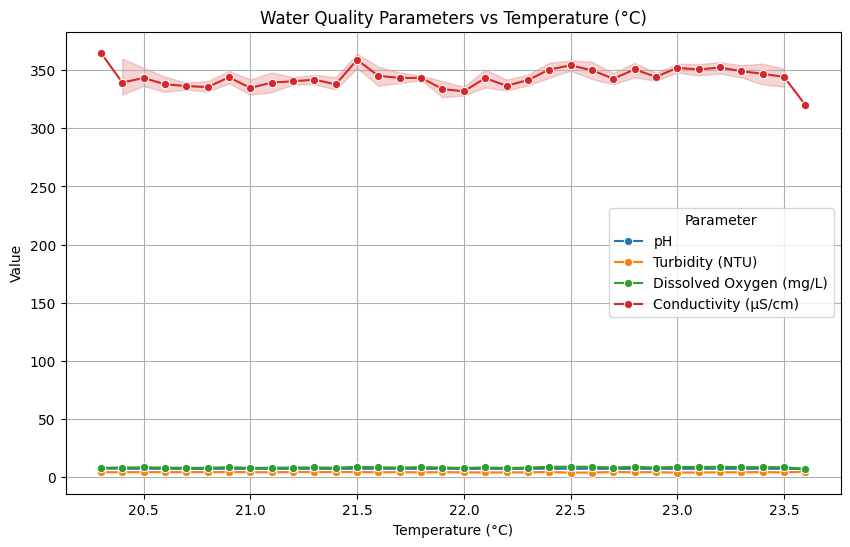

In [42]:
# Melt the DataFrame to long-form
df_melted = df.melt('Temperature (°C)', var_name='Parameter', value_name='Value')

# Function to Create the line plot
def temp_graph():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x='Temperature (°C)', y='Value', hue='Parameter', marker='o')

    # Customize the plot
    plt.title('Water Quality Parameters vs Temperature (°C)')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Value')
    plt.legend(title='Parameter')
    plt.grid(True)

    # Show the plot
    plt.show()

temp_graph()

The data needs to be standardised to compare the different variables fairly.

In [83]:
# Separate the 'Temperature' column as you don't want to scale it
temperature = df['Temperature (°C)']

# Drop the 'Temperature' and 'pH' columns
df_to_scale = df.drop(columns=['Temperature (°C)', 'pH'])
pH_to_scale = df[['pH']]

# Initialize the MinMaxScaler and StandardScaler
scaler = MinMaxScaler()
st_scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_to_scale)
pH_scaled = st_scaler.fit_transform(pH_to_scale)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

# Add the 'Temperature' and 'pH' columns back
scaled_df['Temperature (°C)'] = temperature.values
scaled_df['pH'] = pH_scaled

print(scaled_df)

     Turbidity (NTU)  Dissolved Oxygen (mg/L)  Conductivity (µS/cm)  \
0               0.70                 0.461538              0.481481   
1               1.00                 0.051282              0.351852   
2               0.40                 0.589744              0.740741   
3               0.05                 0.897436              0.203704   
4               0.35                 0.538462              0.666667   
..               ...                      ...                   ...   
495             0.75                 0.282051              0.203704   
496             0.35                 0.871795              0.833333   
497             0.80                 0.384615              0.333333   
498             0.40                 0.692308              0.796296   
499             0.65                 0.564103              0.425926   

     Temperature (°C)        pH  
0                23.1  0.827197  
1                22.3 -0.476062  
2                21.5 -1.220781  
3          

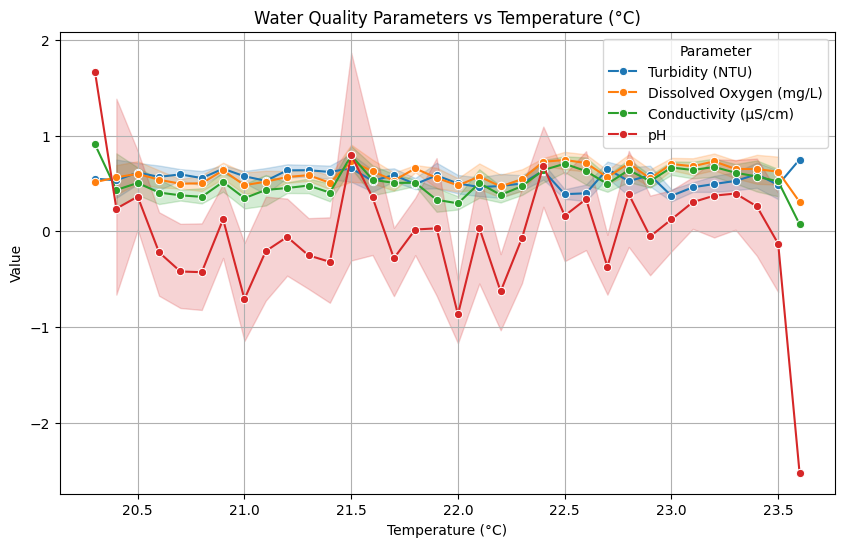

In [84]:
# Melt the scaled_df and plot graph
df_melted = scaled_df.melt('Temperature (°C)', var_name='Parameter', value_name='Value')

temp_graph()

Let's see if there are any noticable trends in the data 

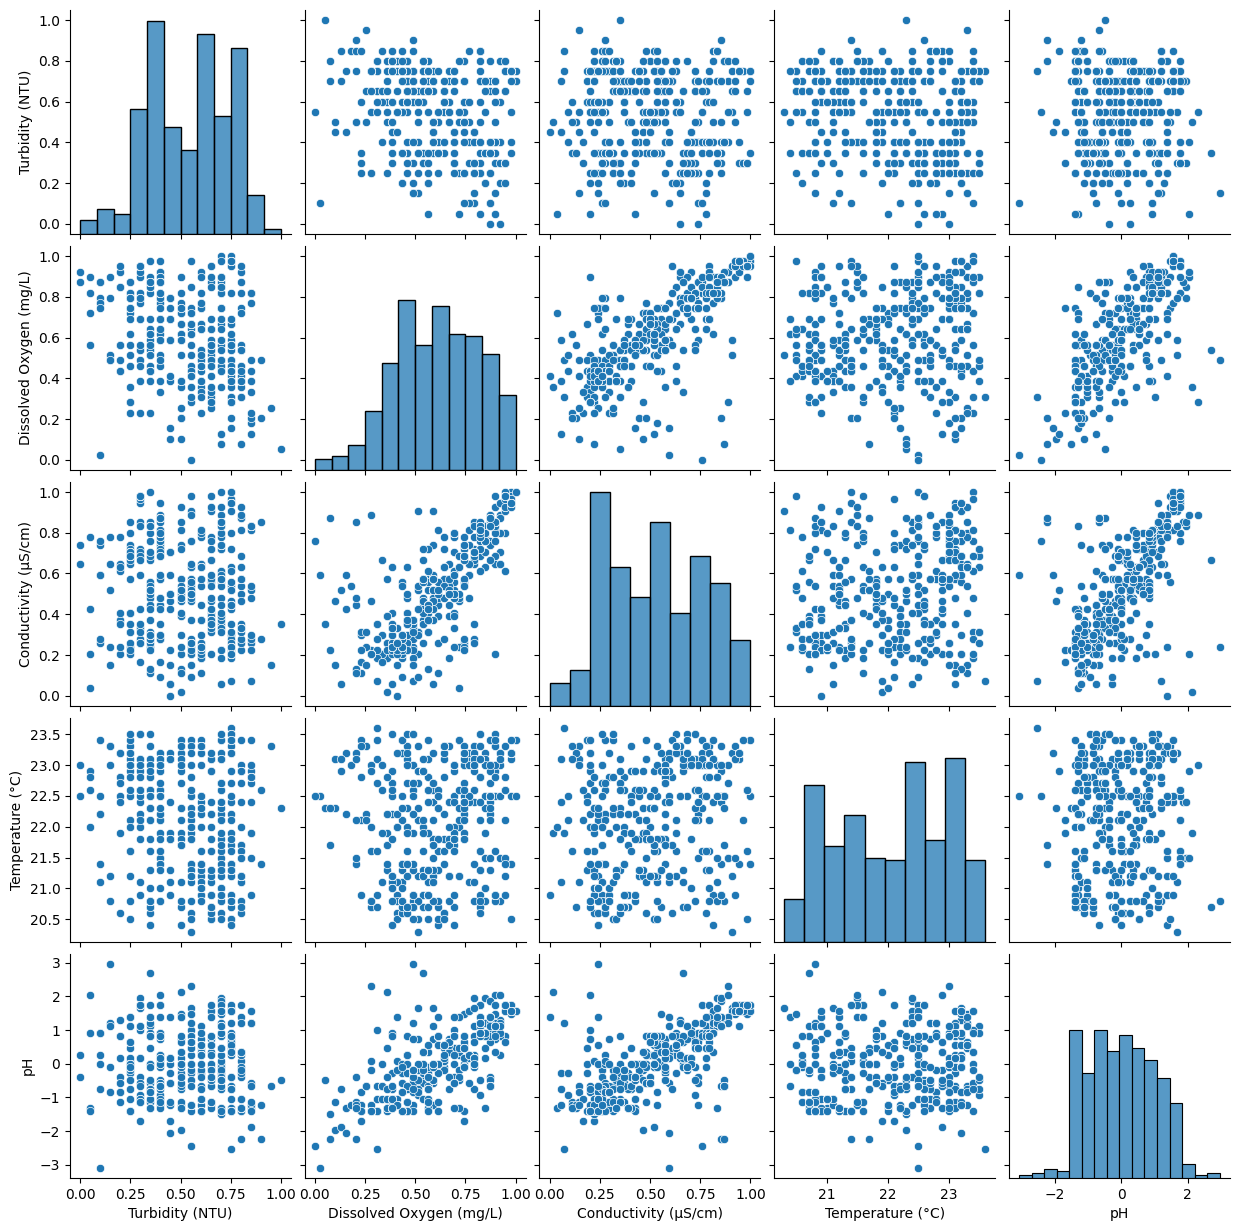

In [86]:
sns.pairplot(scaled_df)

There appear to be the following correlations:
* pH v DO
* pH v conductivity
* conductivity v DO


The focus should initially be on this triad of features

In [87]:
df.columns

Index(['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)',
       'Conductivity (µS/cm)'],
      dtype='object')

In [88]:
triad_feat = scaled_df.drop(columns=['Temperature (°C)', 'Turbidity (NTU)'])
triad_feat.head

<bound method NDFrame.head of      Dissolved Oxygen (mg/L)  Conductivity (µS/cm)        pH
0                   0.461538              0.481481  0.827197
1                   0.051282              0.351852 -0.476062
2                   0.589744              0.740741 -1.220781
3                   0.897436              0.203704  2.037366
4                   0.538462              0.666667  2.688996
..                       ...                   ...       ...
495                 0.282051              0.203704 -1.406961
496                 0.871795              0.833333  1.385737
497                 0.384615              0.333333 -1.313871
498                 0.692308              0.796296  0.827197
499                 0.564103              0.425926 -0.382972

[500 rows x 3 columns]>

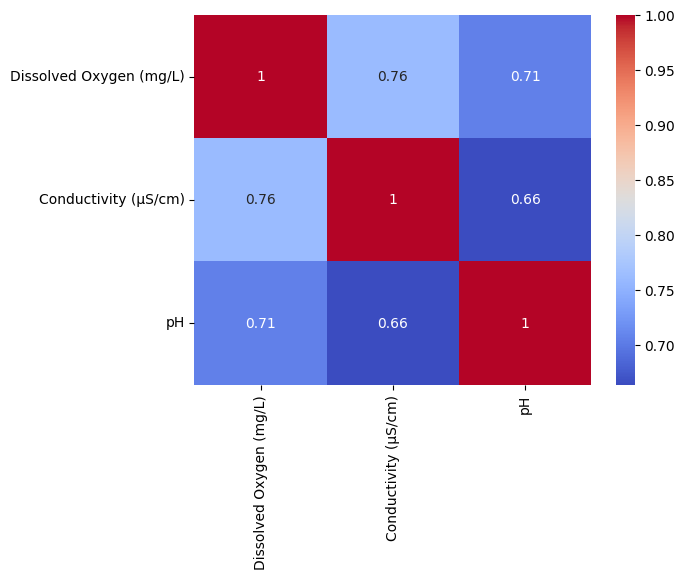

In [89]:
# Make a correlation matrix from these features
# Compute the correlation matrix
corr_matrix = triad_feat.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We could look at Principle Component Analysis to reduce dimensionality.

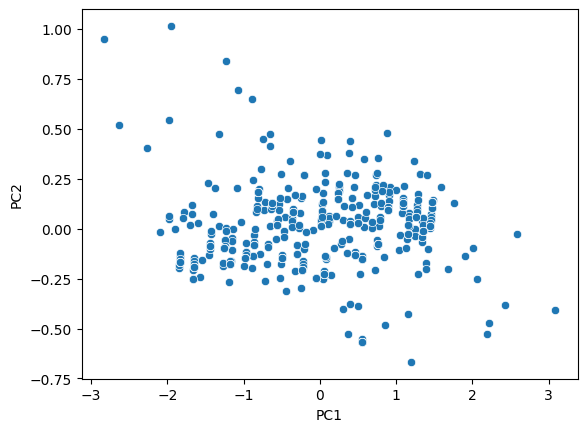

In [90]:
# Fit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(triad_feat)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.show()


In [60]:
triad_feat.columns

Index(['pH', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)'], dtype='object')

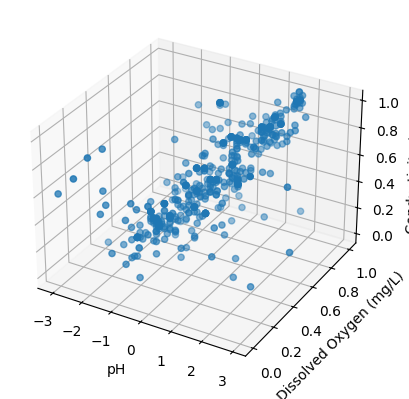

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(triad_feat['pH'], triad_feat['Dissolved Oxygen (mg/L)'], triad_feat['Conductivity (µS/cm)'])
ax.set(xlabel='pH', ylabel ='Dissolved Oxygen (mg/L)', zlabel= 'Conductivity (µS/cm)')

# plt.tight_layout()
plt.show()